In [34]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import linear_sum_assignment

In [3]:
img_paths = []
label_paths = []

img_dir = "KITTI_Selection/images/"
label_dir = "KITTI_Selection/labels/"
for filename in os.listdir(img_dir):
    if filename.endswith(".png"):
        img_path = os.path.join(img_dir, filename)
        label_path = os.path.join(label_dir, filename.replace(".png", ".txt"))
        img_paths.append(img_path)
        label_paths.append(label_path)


In [4]:
img_path = "KITTI_Selection/images/006037.png"
image = cv2.imread(img_path)
label_path = img_path.replace("images", "labels").replace(".png", ".txt")

In [5]:
with open('KITTI_Selection/labels/006037.txt', 'r', encoding='utf-8') as f:
    content = f.read()
    stripped_content = content.strip()
    print(content)

allcoords = []

for line in stripped_content.split('\n'):
    line_content = line.split(' ')
    coords = line_content[1:5]
    allcoords.append(coords)
    print(coords)

print(allcoords)

Car 664.33 174.8 743.04 239.61 17.309777537116815
Car 532.68 172.05 576.93 209.92 31.335887346157413
Car 659.73 177.04 706.5 221.85 23.63553261286652
Car 651.86 170.46 694.95 209.64 29.640773466045783
Car 643.29 172.22 681.11 204.34 34.92210622856619

['664.33', '174.8', '743.04', '239.61']
['532.68', '172.05', '576.93', '209.92']
['659.73', '177.04', '706.5', '221.85']
['651.86', '170.46', '694.95', '209.64']
['643.29', '172.22', '681.11', '204.34']
[['664.33', '174.8', '743.04', '239.61'], ['532.68', '172.05', '576.93', '209.92'], ['659.73', '177.04', '706.5', '221.85'], ['651.86', '170.46', '694.95', '209.64'], ['643.29', '172.22', '681.11', '204.34']]


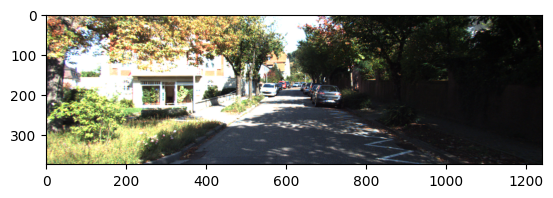

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

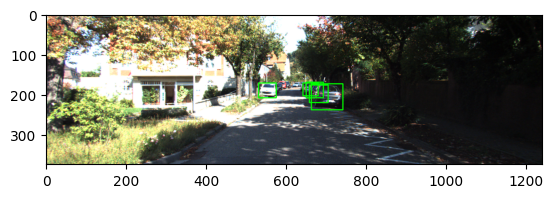

In [7]:
for i in allcoords:
    coords = [int(float(j)) for j in i]
    boxed = cv2.rectangle(image, (coords[0], coords[1]), (coords[2], coords[3]), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(boxed, cv2.COLOR_BGR2RGB))

plt.show()

In [8]:
cv2.imwrite('labelled.jpg', image)

True

In [9]:
# Create a new YOLO model from scratch
model = YOLO("yolo11n.yaml")

# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolo11n.pt")

# Train the model using the 'coco8.yaml' dataset for 3 epochs
results = model.train(data="coco8.yaml", epochs=3)

New https://pypi.org/project/ultralytics/8.3.251 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.238  Python-3.12.10 torch-2.9.1+cpu CPU (AMD Ryzen 5 5600U with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, opt

In [10]:
results = model.val()

Ultralytics 8.3.238  Python-3.12.10 torch-2.9.1+cpu CPU (AMD Ryzen 5 5600U with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 206.6111.8 MB/s, size: 54.0 KB)
val: Scanning C:\Projects\Computer Vision\Task_2\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 538.9it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.2it/s 0.5s
                   all          4         17      0.556       0.85      0.886      0.635
                person          3         10      0.549        0.6      0.588       0.27
                   dog          1          1      0.538          1      0.995      0.697
                 horse          1          2      0.491          1      0.995      0.674
              elephant          1          2      0.359        0.5      0.745       0.28
             

In [11]:
results = model(img_path)

image 1/1 c:\Projects\Computer Vision\Task_2\KITTI_Selection\images\006037.png: 224x640 4 cars, 122.4ms
Speed: 4.3ms preprocess, 122.4ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 640)


In [12]:
success = model.export(format="onnx")

Ultralytics 8.3.238  Python-3.12.10 torch-2.9.1+cpu CPU (AMD Ryzen 5 5600U with Radeon Graphics)

PyTorch: starting from 'C:\Projects\Computer Vision\Task_2\runs\detect\train10\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.3 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.80...
ONNX: export success  3.7s, saved as 'C:\Projects\Computer Vision\Task_2\runs\detect\train10\weights\best.onnx' (10.2 MB)

Export complete (4.0s)
Results saved to C:\Projects\Computer Vision\Task_2\runs\detect\train10\weights
Predict:         yolo predict task=detect model=C:\Projects\Computer Vision\Task_2\runs\detect\train10\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Projects\Computer Vision\Task_2\runs\detect\train10\weights\best.onnx imgsz=640 data=C:\Users\ND\AppData\Local\Programs\Python\Python312\Lib\site-packages\ultralytics\cfg\datasets\coco8.yaml  
Visualize:       https://netron.ap

In [13]:
img = cv2.imread(img_path)

for result in results[0]:
    # print(result.boxes.xyxy)
    # print(result.boxes.conf)
    # print(result.boxes.cls)
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite('output_detected.jpg', img)
cv2.imshow('YOLO Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [77]:
gt_boxes = []
det_boxes = []

canvas = cv2.imread(img_path)
gtimage = cv2.imread(img_path) 
detimage = cv2.imread(img_path)

with open(label_path, 'r') as f:
    for gt_idx, line in enumerate(f):
        parts = line.strip().split(' ')
        if not parts or len(parts) < 6:
            continue
             
        coords = [int(float(x)) for x in parts[1:5]]   
        gt_boxes.append(coords) 
        dist_gt = float(parts[5])
        cv2.rectangle(canvas, (coords[0], coords[1]), (coords[2], coords[3]), (0, 255, 0), 2)
        cv2.rectangle(gtimage, (coords[0], coords[1]), (coords[2], coords[3]), (0, 255, 0), 2)
        label_text = f"{gt_idx}"
        # cv2.putText(canvas, label_text, (coords[0], coords[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 2)
        cv2.putText(gtimage, label_text, (coords[0], coords[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
results = model(img_path, verbose=False)

for result in results:
    for dt_idx, box in enumerate(result.boxes):
        print(f"BOX: {box}")
        class_id = int(box.cls[0])
        
        if class_id == 2: 
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            det_boxes.append([x1, y1, x2, y2])
            cv2.rectangle(canvas, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.rectangle(detimage, (x1, y1), (x2, y2), (0, 0, 255), 2)
            label_text = f"{dt_idx}"
            # cv2.putText(canvas, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 2)
            cv2.putText(detimage, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

cv2.imwrite(f'test_result.jpg', canvas)
cv2.imwrite(f'gt_boxes.jpg', gtimage)
cv2.imwrite(f'det_boxes.jpg', detimage)

BOX: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.7967])
data: tensor([[666.0688, 176.1167, 739.5591, 233.3038,   0.7967,   2.0000]])
id: None
is_track: False
orig_shape: (375, 1242)
shape: torch.Size([1, 6])
xywh: tensor([[702.8140, 204.7102,  73.4903,  57.1871]])
xywhn: tensor([[0.5659, 0.5459, 0.0592, 0.1525]])
xyxy: tensor([[666.0688, 176.1167, 739.5591, 233.3038]])
xyxyn: tensor([[0.5363, 0.4696, 0.5955, 0.6221]])
BOX: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.4256])
data: tensor([[5.3552e+02, 1.7184e+02, 5.8080e+02, 2.0612e+02, 4.2557e-01, 2.0000e+00]])
id: None
is_track: False
orig_shape: (375, 1242)
shape: torch.Size([1, 6])
xywh: tensor([[558.1602, 188.9791,  45.2816,  34.2867]])
xywhn: tensor([[0.4494, 0.5039, 0.0365, 0.0914]])
xyxy: tensor([[535.5193, 171.8357, 580.8009, 206.1224]])
xyxyn: tensor([[0.4312, 0.4582, 0.4676, 0.5497]])
BOX: ultralytics.engine.results.Boxes object wit

True

In [79]:
Ious = []
for gt in gt_boxes:
    gt_x1, gt_y1, gt_x2, gt_y2 = gt
    Iou_row = []
    for det in det_boxes:
        det_x1, det_y1, det_x2, det_y2 = det

        inter_x1 = max(gt_x1, det_x1)
        inter_y1 = max(gt_y1, det_y1)
        inter_x2 = min(gt_x2, det_x2)
        inter_y2 = min(gt_y2, det_y2)
        
        inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)
        
        gt_area = (gt_x2 - gt_x1) * (gt_y2 - gt_y1)
        det_area = (det_x2 - det_x1) * (det_y2 - det_y1)
        union_area = gt_area + det_area - inter_area
        
        iou = inter_area / union_area
        Iou_row.append(iou)
    Ious.append(Iou_row)
        

In [80]:
print("Ground Truth Boxes:", gt_boxes)
print("Detected Boxes:", det_boxes)

Ious = np.array(Ious)
print("IoU Matrix:")
print(Ious)

Ground Truth Boxes: [[664, 174, 743, 239], [532, 172, 576, 209], [659, 177, 706, 221], [651, 170, 694, 209], [643, 172, 681, 204]]
Detected Boxes: [[666, 176, 739, 233], [535, 171, 580, 206], [614, 171, 639, 187], [639, 171, 669, 202]]
IoU Matrix:
[[    0.81032           0           0    0.023629]
 [          0     0.77059           0           0]
 [    0.39382           0           0    0.090975]
 [    0.18803           0           0     0.27233]
 [   0.084729           0           0     0.57101]]


In [87]:
def hungarian_algorithm(cmtr):
    row_ind, col_ind = linear_sum_assignment(-cmtr)
    for gt_idx, dt_idx in zip(row_ind, col_ind):
        iou_value = cmtr[gt_idx, dt_idx]
        if iou_value < 0.5:
            row_ind = np.delete(row_ind, gt_idx)
            col_ind = np.delete(col_ind, dt_idx)
    return row_ind, col_ind

In [88]:
row_ind, col_ind = hungarian_algorithm(Ious)

In [ ]:
print(row_ind, col_ind)

[0 1 4] [0 1 3]
